<a href="https://colab.research.google.com/github/berktayfuner/EMOTWEETS/blob/main/nlp_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn transformers datasets


In [ ]:
import pandas as pd

# Read dataset
df = pd.read_csv("emotion.csv")

# Let's take a look at the first lines
df.head()


,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [ ]:
import re

def clean_text(text):
    text = text.lower()  # convert to lower case
    text = re.sub(r'http\S+', '', text)  # clear links
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # fix gaps
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,text,label,clean_text
0,Just got back from seeing @GaryDelaney in Burs...,joy,just got back from seeing garydelaney in bursl...
1,Oh dear an evening of absolute hilarity I don'...,joy,oh dear an evening of absolute hilarity i dont...
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,been waiting all week for this game cheer friday
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,gardinerlove thank you so much gloria youre so...
4,I feel so blessed to work with the family that...,joy,i feel so blessed to work with the family that...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label'] # Changed 'emotion' to 'label'

# Training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Assumption
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8077455048409405
Classification Report:
               precision    recall  f1-score   support

       anger       0.80      0.80      0.80       154
        fear       0.72      0.91      0.81       223
         joy       0.95      0.79      0.86       185
     sadness       0.83      0.69      0.75       161

    accuracy                           0.81       723
   macro avg       0.83      0.80      0.81       723
weighted avg       0.82      0.81      0.81       723



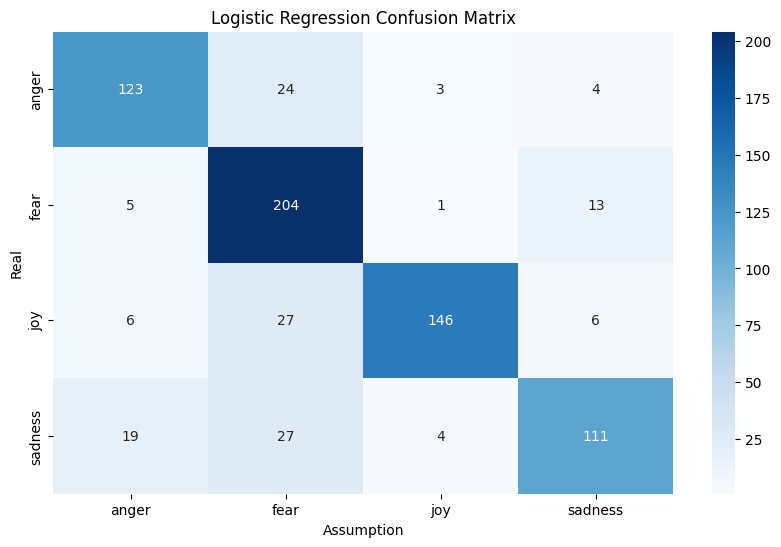

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Assumption")
plt.ylabel("Real")
plt.show()


In [ ]:
from transformers import pipeline

# Transformer model for sentiment analysis
classifier = pipeline("text-classification", model="bhadresh-savani/bert-base-uncased-emotion", top_k=1)

# Let's take a few examples from the test data
test_texts = df['text'].sample(10).tolist()

#
for text in test_texts:
    result = classifier(text)[0][0]  # Dış liste ve içteki sözlük elemanı
    print(f"Text: {text}")
    print(f"Predicted Emotion: {result['label']}, Confidence Score: {round(result['score'], 3)}")
    print("-"*50)


config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Text: the prospect of getting choked out by a hot daddy tonight is sorta cheering me up but I also kinda just wanna watch the new AHS episode lol
Predicted Emotion: love, Confidence Score: 0.981
--------------------------------------------------
Text: @savageimiike one of my favorite songs brother, real talk. #rage
Predicted Emotion: anger, Confidence Score: 0.974
--------------------------------------------------
Text: Accept the challenges so that you can feel the exhilaration of victory.
Predicted Emotion: joy, Confidence Score: 0.999
--------------------------------------------------
Text: An hour played and @ASFCofficial have conceded less at West ham than @ManUtd have at northampton.  Let that sink in.
Predicted Emotion: joy, Confidence Score: 0.703
--------------------------------------------------
Text: My siblings look all gangster &amp; I look all cheery 😅😂
Predicted Emotion: joy, Confidence Score: 0.998
--------------------------------------------------
Text:  ughh I just w